<a href="https://colab.research.google.com/github/kyleha-dev/Springboard/blob/main/NYC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.Import Packages

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np

# Visuals
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns

# GeoMap
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
from geopy.exc import GeocoderTimedOut

# 2.Data Gathering


Dataset: https://www1.nyc.gov/site/finance/taxes/property-annualized-sales-update.page

In [3]:
def merge(df_manhattan_init, df_queens_init, df_bronx_init, df_brooklyn_init, df_statenisland_init):
  # merge all datasets
  result = df_manhattan_init.append(df_queens_init).append(df_bronx_init).append(df_brooklyn_init).append(df_statenisland_init)
  return result

In [4]:
def import_2021_datasets():
  df_2021_manhattan_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2021_rollingsales_manhattan.xlsx')
  df_2021_queens_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2021_rollingsales_queens.xlsx')
  df_2021_bronx_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2021_rollingsales_bronx.xlsx')
  df_2021_brooklyn_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2021_rollingsales_brooklyn.xlsx')
  df_2021_statenisland_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2021_rollingsales_statenisland.xlsx')

  df_2021 = merge(df_2021_manhattan_init, df_2021_queens_init, df_2021_bronx_init, df_2021_brooklyn_init, df_2021_statenisland_init)

  return df_2021

In [5]:
def import_2020_datasets():
  df_2020_manhattan_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2020_rollingsales_manhattan.xlsx')
  df_2020_queens_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2020_rollingsales_queens.xlsx')
  df_2020_bronx_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2020_rollingsales_bronx.xlsx')
  df_2020_brooklyn_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2020_rollingsales_brooklyn.xlsx')
  df_2020_statenisland_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2020_rollingsales_statenisland.xlsx')

  df_2020 = merge(df_2020_manhattan_init, df_2020_queens_init, df_2020_bronx_init, df_2020_brooklyn_init, df_2020_statenisland_init)

  return  df_2020

In [6]:
def import_2019_datasets():
  df_2019_manhattan_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2019_rollingsales_manhattan.xlsx')
  df_2019_queens_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2019_rollingsales_queens.xlsx')
  df_2019_bronx_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2019_rollingsales_bronx.xlsx')
  df_2019_brooklyn_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2019_rollingsales_brooklyn.xlsx')
  df_2019_statenisland_init = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/NYC/data/2019_rollingsales_statenisland.xlsx')

  df_2019 = merge(df_2019_manhattan_init, df_2019_queens_init, df_2019_bronx_init, df_2019_brooklyn_init, df_2019_statenisland_init)

  return df_2019

In [7]:
df_2021 = import_2021_datasets()

In [8]:
df_2020 = import_2020_datasets()

In [9]:
df_2019 = import_2019_datasets()

In [10]:
df_2021.head()

BOROUGH   NEIGHBORHOOD  ... SALE PRICE  SALE DATE
0        1  ALPHABET CITY  ...  2385000.0 2021-02-09
1        1  ALPHABET CITY  ...   154196.0 2021-06-11
2        1  ALPHABET CITY  ...        0.0 2021-11-15
3        1  ALPHABET CITY  ...  7500000.0 2021-06-14
4        1  ALPHABET CITY  ...  3425000.0 2021-02-11

[5 rows x 21 columns]

In [11]:
df_2020.head()

BOROUGH   NEIGHBORHOOD  ... SALE PRICE  SALE DATE
0      1.0  ALPHABET CITY  ...        0.0 2020-10-02
1      1.0  ALPHABET CITY  ...        0.0 2020-10-31
2      1.0  ALPHABET CITY  ...  4350000.0 2020-07-16
3      1.0  ALPHABET CITY  ...        0.0 2020-12-27
4      1.0  ALPHABET CITY  ...  3672530.0 2020-11-24

[5 rows x 21 columns]

In [12]:
df = df_2021.append(df_2020).append(df_2019)

In [13]:
df.head()

BOROUGH   NEIGHBORHOOD  ...  SALE DATE EASE-MENT
0      1.0  ALPHABET CITY  ... 2021-02-09       NaN
1      1.0  ALPHABET CITY  ... 2021-06-11       NaN
2      1.0  ALPHABET CITY  ... 2021-11-15       NaN
3      1.0  ALPHABET CITY  ... 2021-06-14       NaN
4      1.0  ALPHABET CITY  ... 2021-02-11       NaN

[5 rows x 22 columns]

# 3.Data Briefing


In [14]:
print(len(df.columns))
print(df.columns)

22
Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASEMENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE', 'EASE-MENT'],
      dtype='object')


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244566 entries, 0 to 8370
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   BOROUGH                         244563 non-null  float64       
 1   NEIGHBORHOOD                    244563 non-null  object        
 2   BUILDING CLASS CATEGORY         244563 non-null  object        
 3   TAX CLASS AT PRESENT            244165 non-null  object        
 4   BLOCK                           244563 non-null  float64       
 5   LOT                             244563 non-null  float64       
 6   EASEMENT                        0 non-null       float64       
 7   BUILDING CLASS AT PRESENT       244165 non-null  object        
 8   ADDRESS                         244562 non-null  object        
 9   APARTMENT NUMBER                56454 non-null   object        
 10  ZIP CODE                        244538 non-null  float64  

In [16]:
def format_df(df):
  #init 
  df_formatting = df
  
  # Drop EASEMENT and index
  df_formatting = df_formatting.drop('EASEMENT', 1).drop('EASE-MENT', 1)

  # Convert to numeric
  cols_to_numerics = ['BLOCK','LOT','COMMERCIAL UNITS', 'TOTAL UNITS','LAND SQUARE FEET','GROSS SQUARE FEET','SALE PRICE','YEAR BUILT','BOROUGH','ZIP CODE']
  df_formatting[cols_to_numerics] = df_formatting[cols_to_numerics].apply(pd.to_numeric)
  ## 'YEAR BUILT TENS'
  df_formatting['YEAR BUILT TENS'] = df_formatting['YEAR BUILT'] - df_formatting['YEAR BUILT']%10
  
  # Convert to DateTime
  cols_to_dateTime = ['SALE DATE']
  df_formatting[cols_to_dateTime] = df[cols_to_dateTime].apply(pd.to_datetime)

  # Get Month/Year from 'SALE DATE'
  df_formatting['SALE MONTH'] = df_formatting['SALE DATE'].dt.month
  df_formatting['SALE YEAR'] = df_formatting['SALE DATE'].dt.year
  df_formatting['SALE MONTH/YEAR'] = df_formatting['SALE MONTH'].astype(str) + "/" + df_formatting['SALE YEAR'].astype(str)

  # Convert to Categories
  cols_to_categories = ['BUILDING CLASS CATEGORY','TAX CLASS AT TIME OF SALE','BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE']
  df_formatting[cols_to_categories] = df_formatting[cols_to_categories].apply(pd.Categorical)
  
  # Get first character of 'BUILDING CLASS AT TIME OF SALE' - https://www.propertyshark.com/mason/text/nyc_building_class.html
  df_formatting['BUILDING CLASS AT TIME OF SALE CATEGORY'] = df_formatting['BUILDING CLASS AT TIME OF SALE'].astype(str).str[0]

  #### Add-ons
  
  #### #### 1. Get Geolocation of logitute and latitude based on the address we have
  #### #### #### - Obstacle: I tried with the address column but errors such as 5th/ 2nd without 'th' causes error, or even with apt numbers attached on it.

  #### #### 2. Get one more dataframe from Zillow by iterating through the address we have
  #### #### #### - Obstacle: This will be time consuming, but this will give insight of investment of houses as well. (Zestimate)

  ####

  #result
  df_formatted = df_formatting.reset_index(drop=True)

  return df_formatted

In [17]:
df_formatted = format_df(df)
df_formatted.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244566 entries, 0 to 244565
Data columns (total 25 columns):
 #   Column                                   Non-Null Count   Dtype         
---  ------                                   --------------   -----         
 0   BOROUGH                                  244563 non-null  float64       
 1   NEIGHBORHOOD                             244563 non-null  object        
 2   BUILDING CLASS CATEGORY                  244563 non-null  category      
 3   TAX CLASS AT PRESENT                     244165 non-null  object        
 4   BLOCK                                    244563 non-null  float64       
 5   LOT                                      244563 non-null  float64       
 6   BUILDING CLASS AT PRESENT                244165 non-null  category      
 7   ADDRESS                                  244562 non-null  object        
 8   APARTMENT NUMBER                         56454 non-null   object        
 9   ZIP CODE                  

In [18]:
pd.set_option("display.max_rows", None)

print(df_formatted[['BUILDING CLASS CATEGORY']].value_counts())
print(df_formatted[['BUILDING CLASS AT TIME OF SALE CATEGORY']].value_counts())
print(df_formatted[['BUILDING CLASS AT TIME OF SALE']].value_counts())

BUILDING CLASS CATEGORY                   
01 ONE FAMILY DWELLINGS                       56160
02 TWO FAMILY DWELLINGS                       46378
10 COOPS - ELEVATOR APARTMENTS                37878
13 CONDOS - ELEVATOR APARTMENTS               36490
03 THREE FAMILY DWELLINGS                     12895
07 RENTALS - WALKUP APARTMENTS                 7985
09 COOPS - WALKUP APARTMENTS                   7885
04 TAX CLASS 1 CONDOS                          4877
15 CONDOS - 2-10 UNIT RESIDENTIAL              4598
44 CONDO PARKING                               3700
17 CONDO COOPS                                 3300
05 TAX CLASS 1 VACANT LAND                     3249
12 CONDOS - WALKUP APARTMENTS                  3118
22 STORE BUILDINGS                             2599
14 RENTALS - 4-10 UNIT                         1604
29 COMMERCIAL GARAGES                          1552
08 RENTALS - ELEVATOR APARTMENTS               1141
21 OFFICE BUILDINGS                            1074
47 CONDO NON-BUSINESS

In [19]:
for col in df_formatted.columns:
  print('--------------------------')
  print(col)
  print(df_formatted[col].value_counts().size)   
  print(df_formatted[col].value_counts().head(50))
  print('--------------------------')

--------------------------
BOROUGH
5
4.0    75907
3.0    69826
1.0    51910
5.0    24861
2.0    22059
Name: BOROUGH, dtype: int64
--------------------------
--------------------------
NEIGHBORHOOD
255
FLUSHING-NORTH               7370
UPPER EAST SIDE (59-79)      5128
UPPER EAST SIDE (79-96)      4829
UPPER WEST SIDE (59-79)      4661
BEDFORD STUYVESANT           4264
BOROUGH PARK                 3845
BAYSIDE                      3259
MIDTOWN EAST                 3115
ASTORIA                      3084
FOREST HILLS                 2891
UPPER WEST SIDE (79-96)      2788
EAST NEW YORK                2772
LONG ISLAND CITY             2752
JACKSON HEIGHTS              2697
BAY RIDGE                    2553
FLUSHING-SOUTH               2494
FLATBUSH-EAST                2454
MIDTOWN WEST                 2452
SHEEPSHEAD BAY               2447
GREAT KILLS                  2438
RICHMOND HILL                2414
CANARSIE                     2412
ELMHURST                     2392
CROWN HEIGHTS    

# 4.Data Visualization


In [20]:
df_target = df_formatted[df_formatted['BUILDING CLASS CATEGORY'].isin(df_formatted['BUILDING CLASS CATEGORY'].value_counts().head(15).keys())]
df_target = df_target[df_target['BUILDING CLASS AT TIME OF SALE CATEGORY'].isin(['A','B','C','D','R'])]

In [21]:
df_target.head()

BOROUGH  ... BUILDING CLASS AT TIME OF SALE CATEGORY
0      1.0  ...                                       A
1      1.0  ...                                       C
2      1.0  ...                                       C
3      1.0  ...                                       C
4      1.0  ...                                       C

[5 rows x 25 columns]

In [22]:
#Residential areas
#BUILDING CLASS AT SALE those starts with A,B,C,D,R
#https://www.propertyshark.com/mason/text/nyc_building_class.html

#['BUILDING CLASS AT TIME OF SALE']

In [23]:
# test exploration
# df_target = df_target[df_target['BUILDING CLASS CATEGORY']=='13 CONDOS - ELEVATOR APARTMENTS']

In [24]:
var = sns.histplot(x='YEAR BUILT', data=df_target)
plt.xlim(1895,2022)

(1895.0, 2022.0)

In [25]:
def histogram_yearbuilt_year_separation():
  g = sns.displot(data= df_target, x='YEAR BUILT',  kde=False, col="SALE YEAR", hue="SALE YEAR", multiple="stack")

  g.fig.set_figwidth(25)
  plt.xlim(1895,2022)
  plt.show()

In [26]:
def histogram_yearbuilt_year_stacked():
  g = sns.displot(data= df_target, x='YEAR BUILT',  kde=False, hue="SALE YEAR", multiple="stack")
  
  g.fig.set_figwidth(25)
  plt.xlim(1895,2022)
  plt.show()

In [27]:
def histogram_yearbuilt_year_kde():
  g = sns.displot(data= df_target, x='YEAR BUILT',  kind='kde', hue="SALE YEAR")

  g.fig.set_figwidth(25)
  plt.xlim(1895,2022)
  plt.show()


In [28]:
def histogram_yearbuilt_year_ecdf():
  g = sns.displot(data= df_target, x='YEAR BUILT',  kind='ecdf', hue="SALE YEAR")
  
  g.fig.set_figwidth(25)
  plt.xlim(1895,2022)
  plt.show()


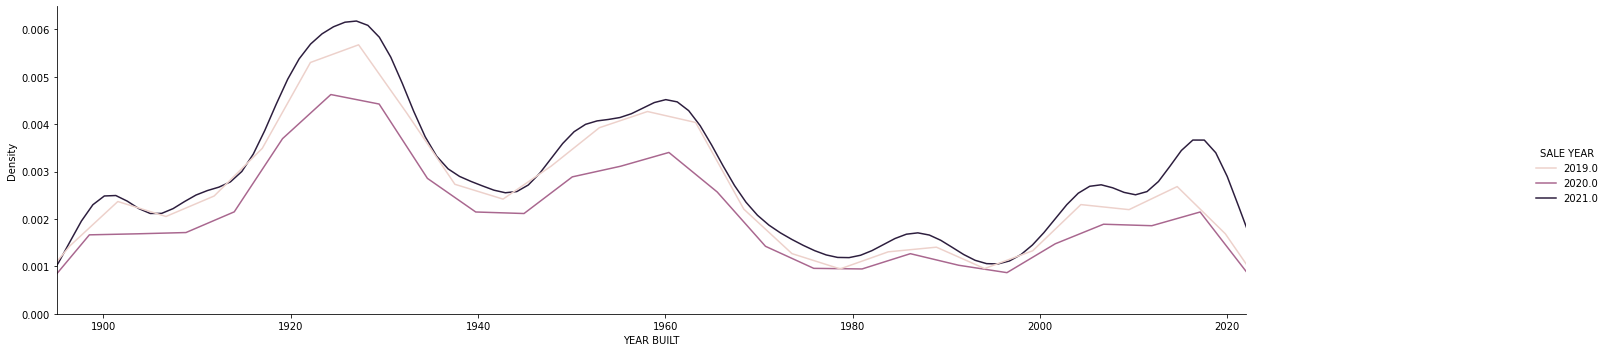

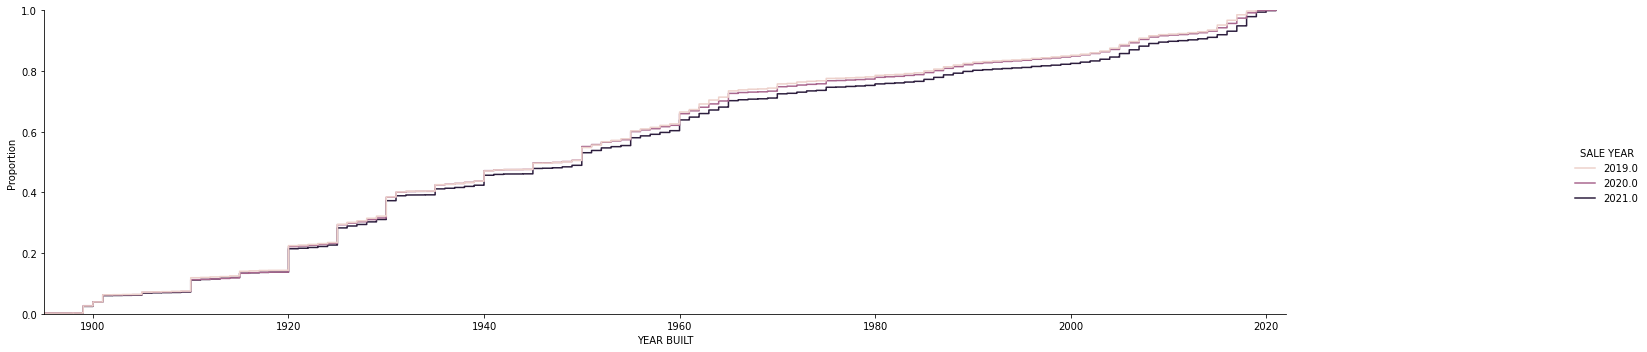

Observation: Throughout 2019 and 2021, the most popular time phrase is 1920 - 1930
                                       the second peak is in 1960s
                                       the third peak is in 2020s
All three years has fairly similar distribution of each years per sold occurances


In [29]:
def yearbuilt_visualization():
  #histogram_yearbuilt_year_separation() #Although this graph is helpful KDE&ECDF sums up nicely
  #histogram_yearbuilt_year_stacked() #Although this graph is helpful KDE&ECDF sums up nicely
  histogram_yearbuilt_year_kde()
  histogram_yearbuilt_year_ecdf()

yearbuilt_visualization()
print("Observation: Throughout 2019 and 2021, the most popular time phrase is 1920 - 1930")
print("                                       the second peak is in 1960s")
print("                                       the third peak is in 2020s")

print("All three years has fairly similar distribution of each years per sold occurances")

In [30]:
def histogram_yearbuilt_borough_kde(year, borough, summary = 0):

  neighborhood = df_target["NEIGHBORHOOD"].value_counts().head(25).index.tolist()

  if summary == 1:
    hue = "BOROUGH"
  elif summary == 2:
    hue = "NEIGHBORHOOD"  
  else:
    hue = "SALE YEAR"

  g = sns.displot(data= df_target.query("`SALE YEAR` in @year and `BOROUGH` in @borough and `NEIGHBORHOOD` in @neighborhood"), x='YEAR BUILT',  kind='kde', hue=hue)

  g.fig.set_figwidth(25)
  plt.xlim(1895,2022)
  plt.show()


In [31]:
def histogram_yearbuilt_borough_ecdf(year, borough, neighborhood, summary = 0):

  neighborhood = df_target["NEIGHBORHOOD"].value_counts().head(25).index.tolist()

  if summary == 1:
    hue = "BOROUGH"
  elif summary == 2:
    hue = "NEIGHBORHOOD"  
  else:
    hue = "SALE YEAR"
    
  g = sns.displot(data= df_target.query("`SALE YEAR` in @year and `BOROUGH` in @borough and `NEIGHBORHOOD` in @neighborhood"), x='YEAR BUILT',  kind='ecdf', hue=hue)
  
  g.fig.set_figwidth(25)
  plt.xlim(1895,2022)
  plt.show()


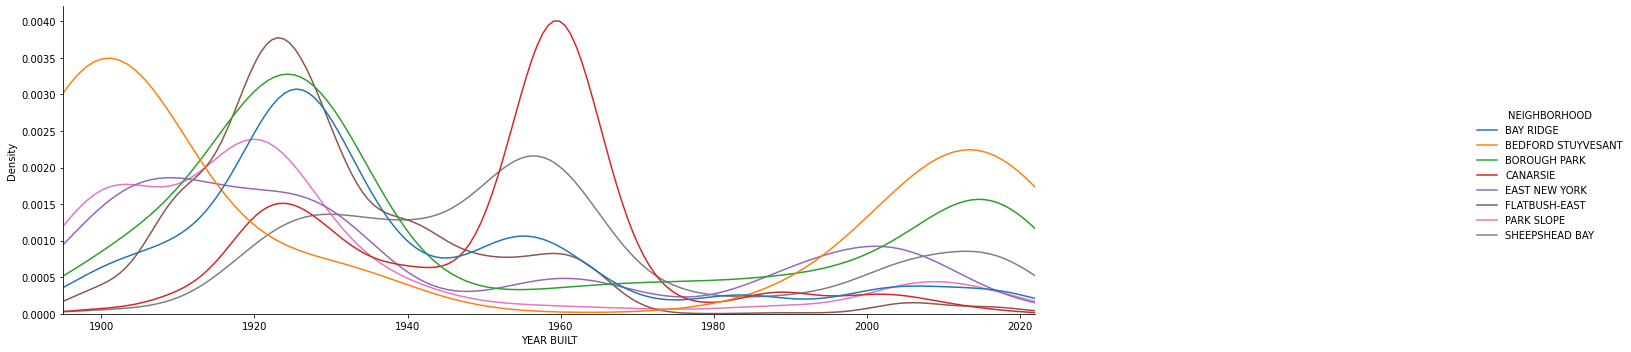

In [32]:
def yearbuilt_borough_visualization():
  histogram_yearbuilt_borough_kde([2019,2020,2021],[1,2,3,4,5], 0)
  #histogram_yearbuilt_borough_ecdf([2019,2020,2021],[1,2,3,4,5],1)

  detail = 1

  if detail == 1:
    summary = 2
    histogram_yearbuilt_borough_kde([2019,2020,2021],[1],summary)
    #histogram_yearbuilt_borough_ecdf([2019,2020,2021],[1])

    histogram_yearbuilt_borough_kde([2019,2020,2021],[2],summary)
    #histogram_yearbuilt_borough_ecdf([2019,2020,2021],[2])

    histogram_yearbuilt_borough_kde([2019,2020,2021],[3],summary)
    #histogram_yearbuilt_borough_ecdf([2019,2020,2021],[3])

    histogram_yearbuilt_borough_kde([2019,2020,2021],[4],summary)
    #histogram_yearbuilt_borough_ecdf([2019,2020,2021],[4])

    histogram_yearbuilt_borough_kde([2019,2020,2021],[5],summary)
    #histogram_yearbuilt_borough_ecdf([2019,2020,2021],[5])


yearbuilt_borough_visualization()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


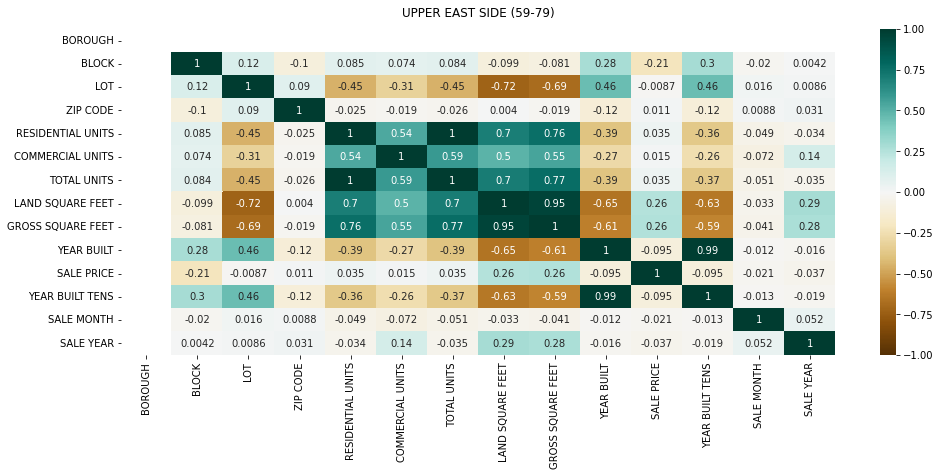

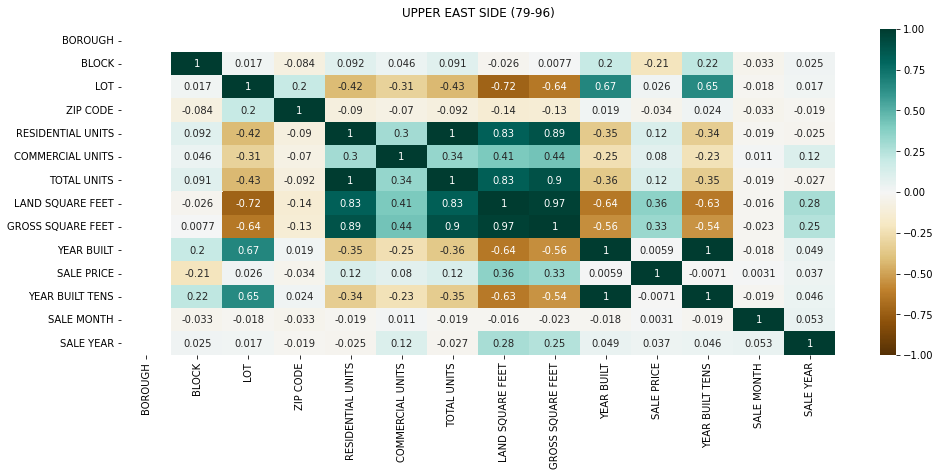

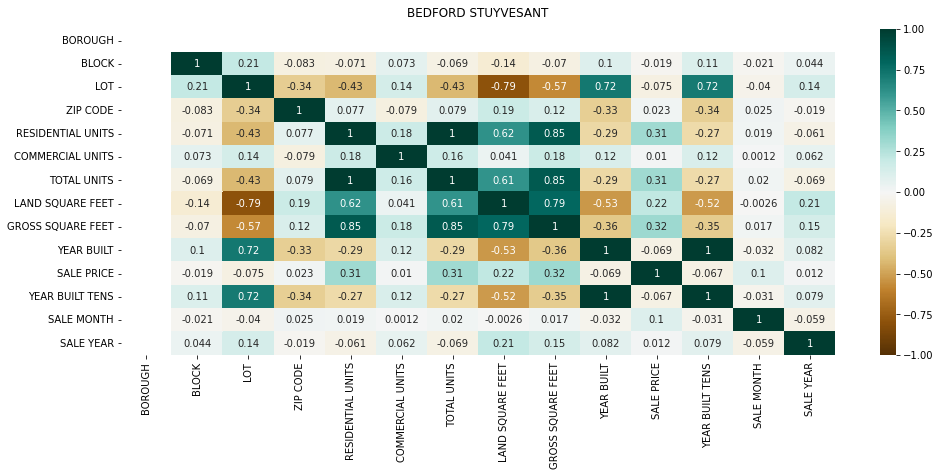

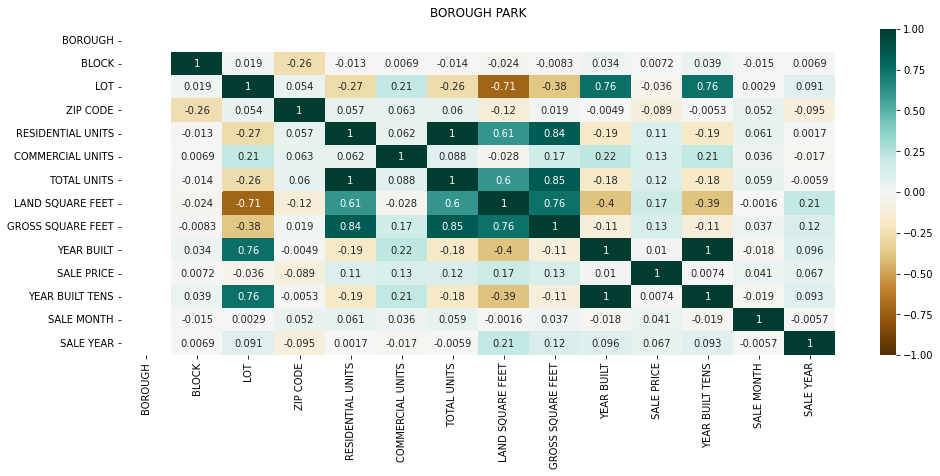

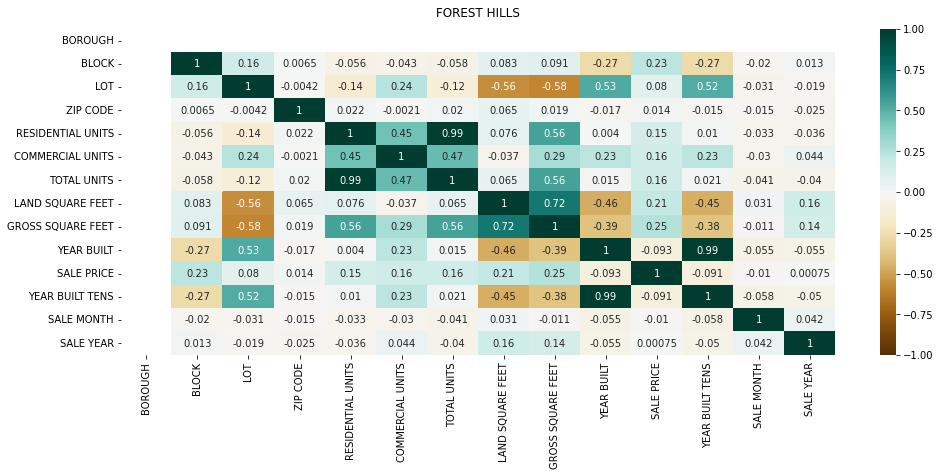

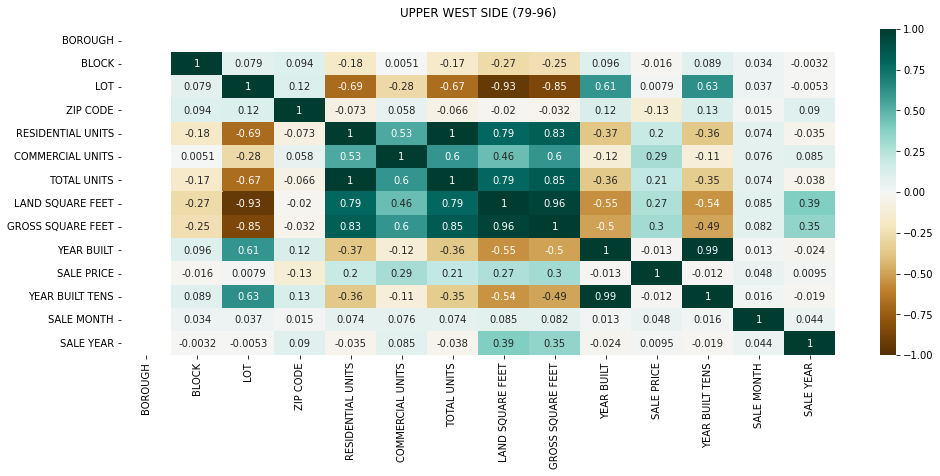

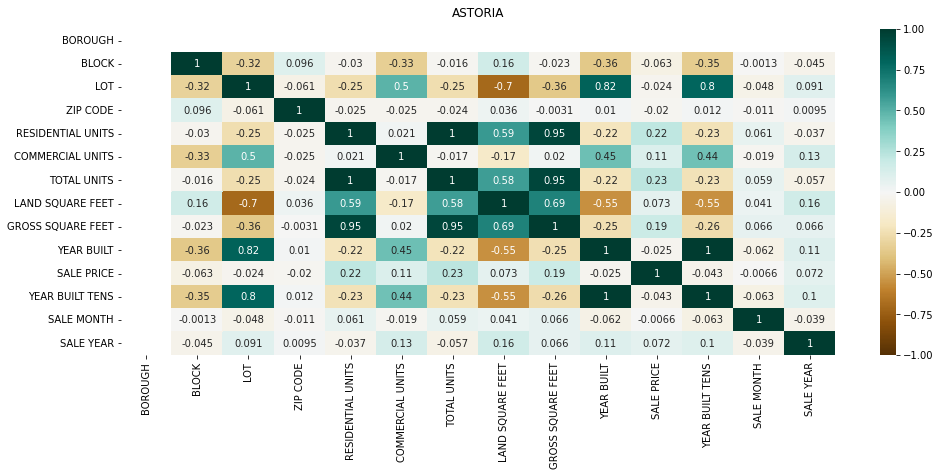

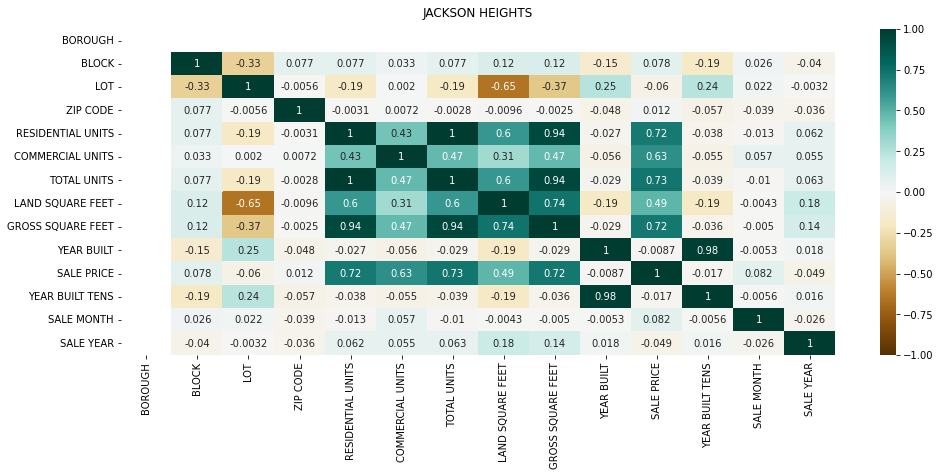

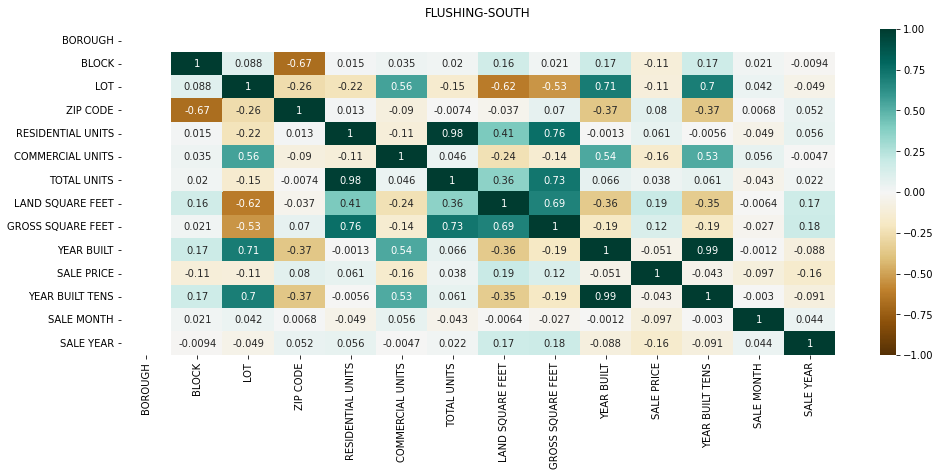

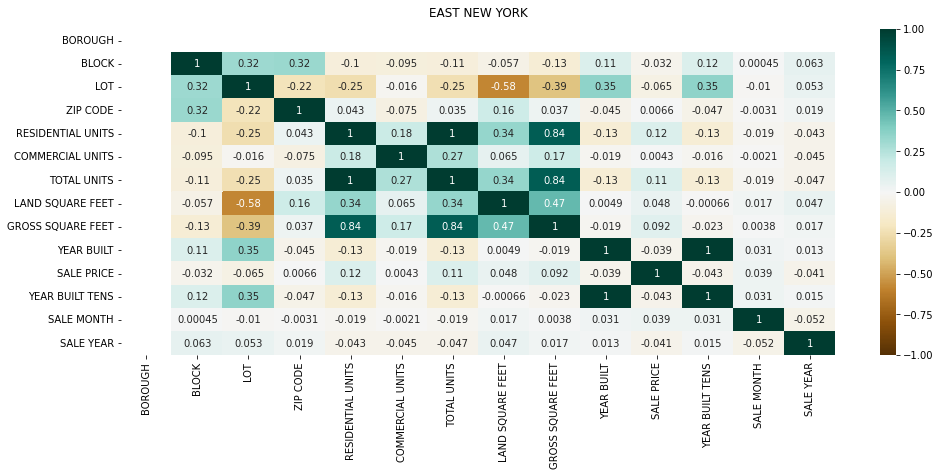

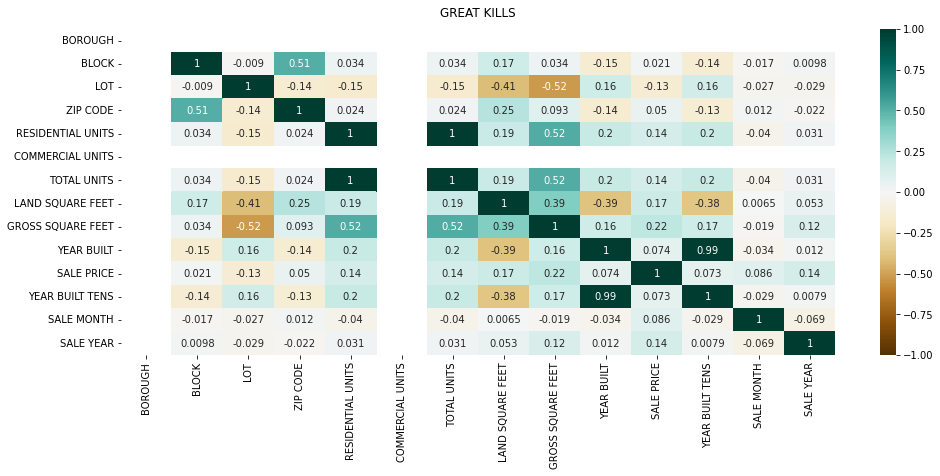

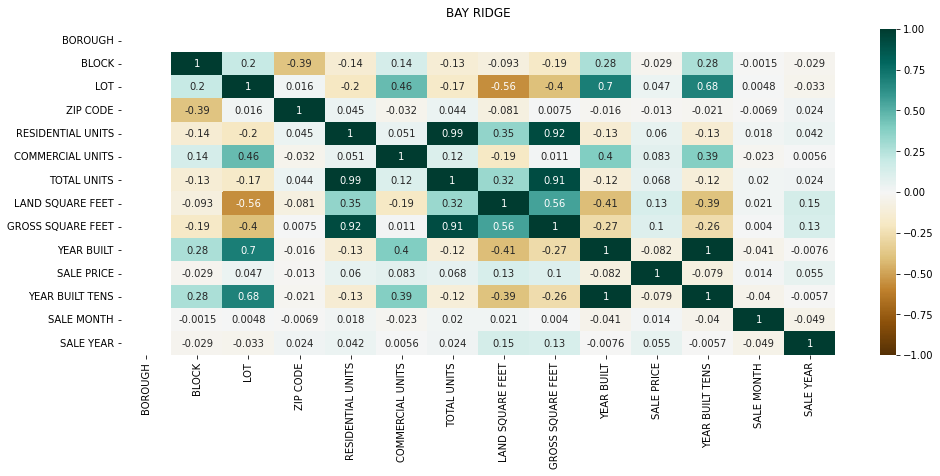

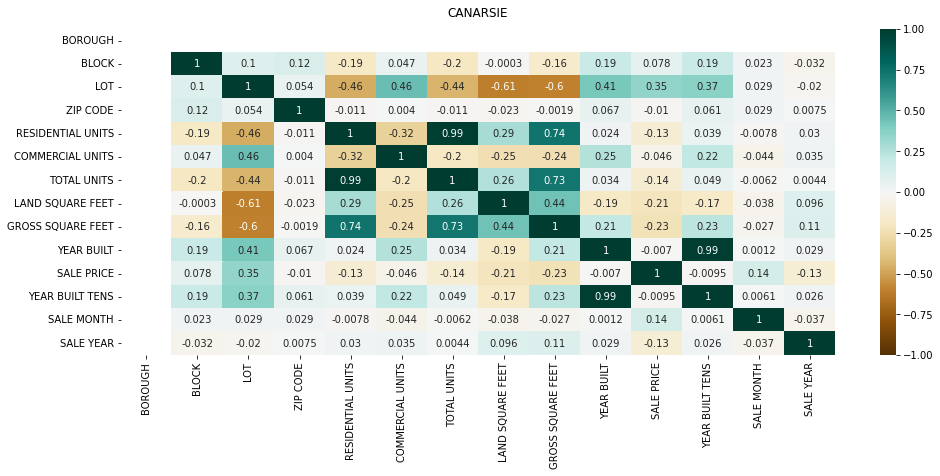

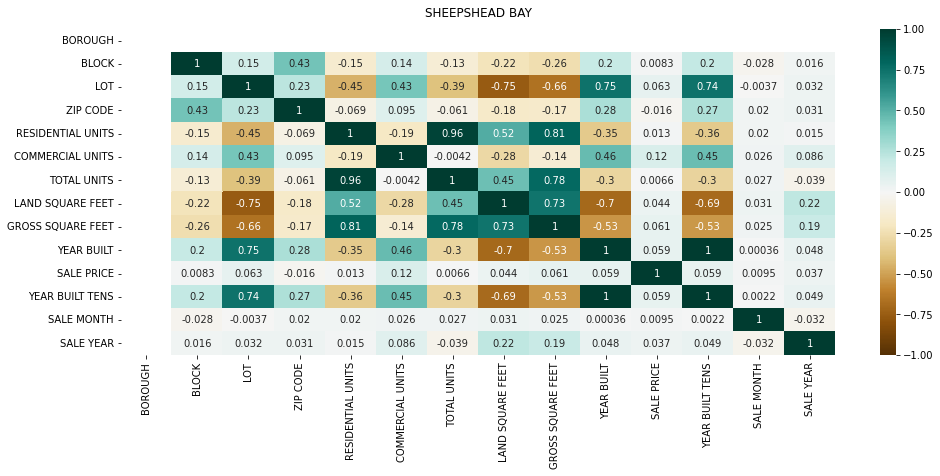

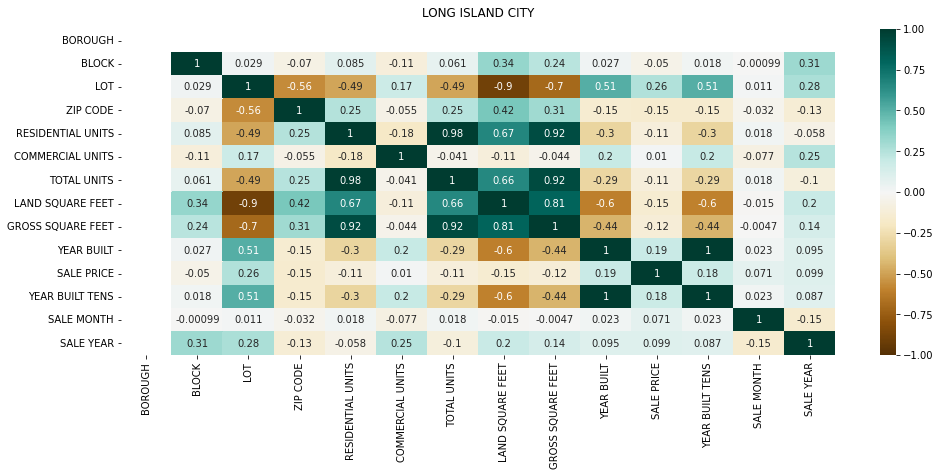

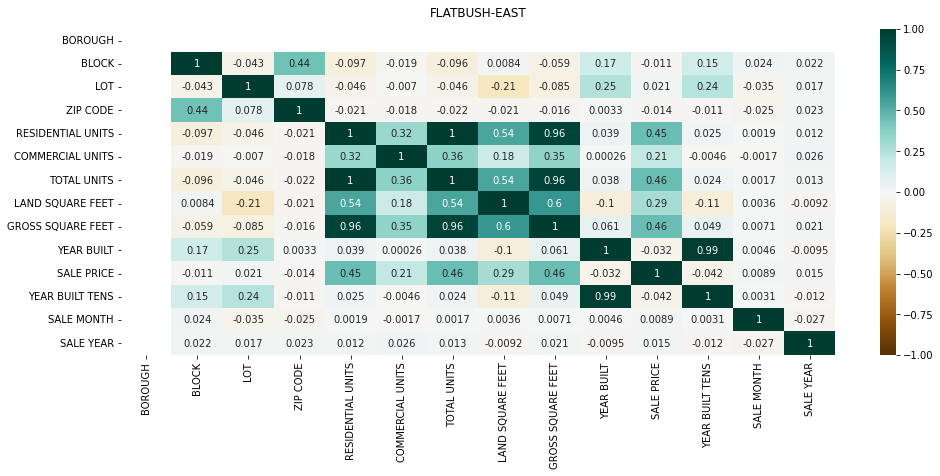

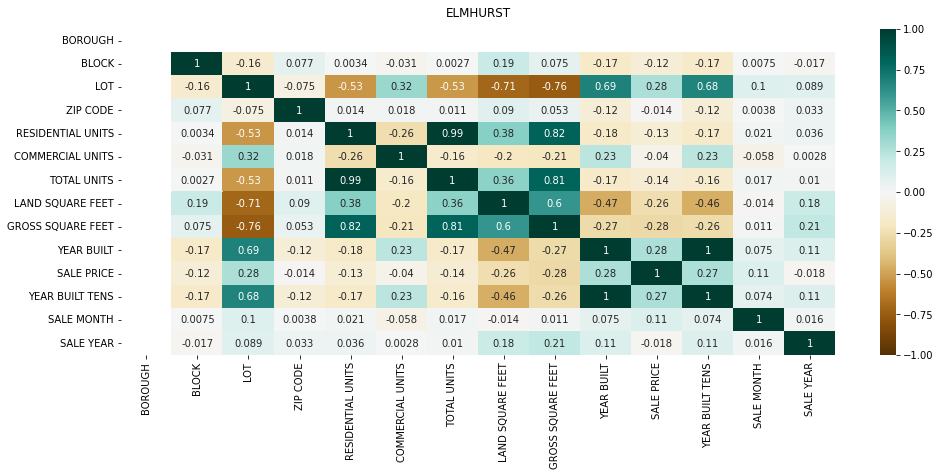

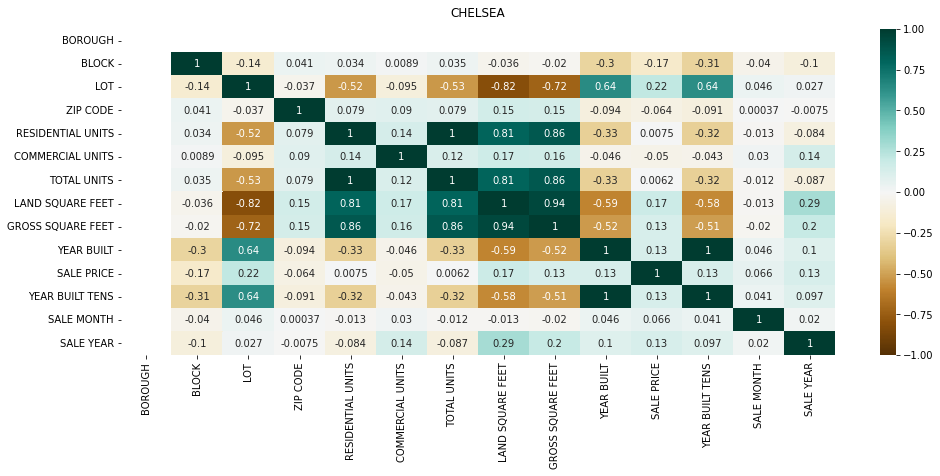

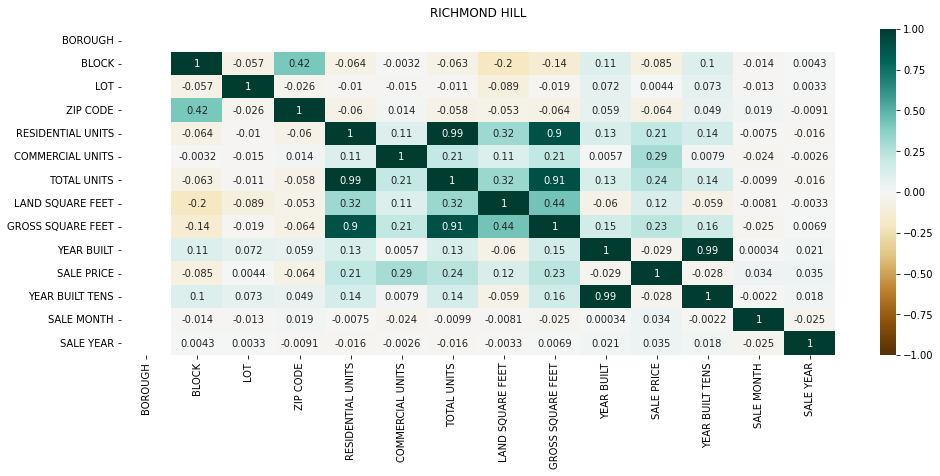

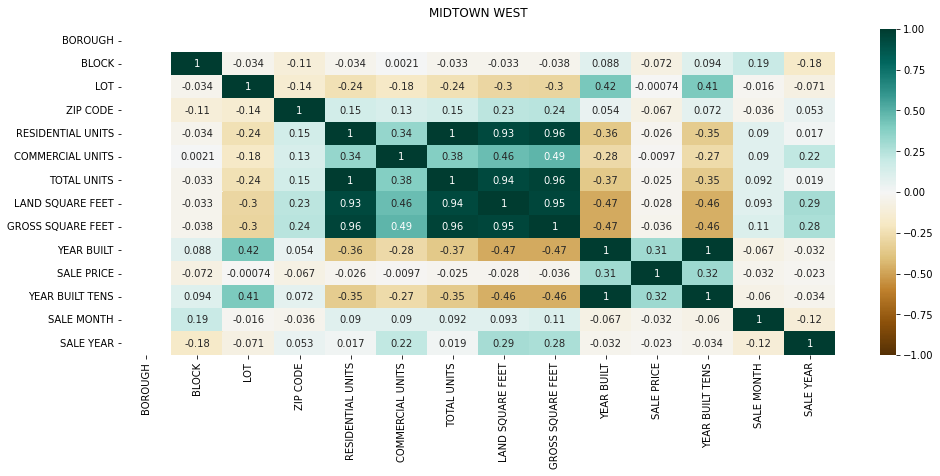

In [33]:
neighborhood = df_target["NEIGHBORHOOD"].value_counts().head(25).index.tolist()

for n in neighborhood:
  # Increase the size of the heatmap.
  plt.figure(figsize=(16, 6))

  # Store heatmap object in a variable to easily access it when you want to include more features (such as title).
  # Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
  heatmap = sns.heatmap(df_target[df_target["NEIGHBORHOOD"]==n].corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')

  # Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
  heatmap.set_title(n, fontdict={'fontsize':12}, pad=12);

In [34]:
df_calendar = df_target.set_index("SALE DATE")
df_calendar.head()

BOROUGH  ... BUILDING CLASS AT TIME OF SALE CATEGORY
SALE DATE            ...                                        
2021-02-09      1.0  ...                                       A
2021-06-11      1.0  ...                                       C
2021-11-15      1.0  ...                                       C
2021-06-14      1.0  ...                                       C
2021-02-11      1.0  ...                                       C

[5 rows x 24 columns]

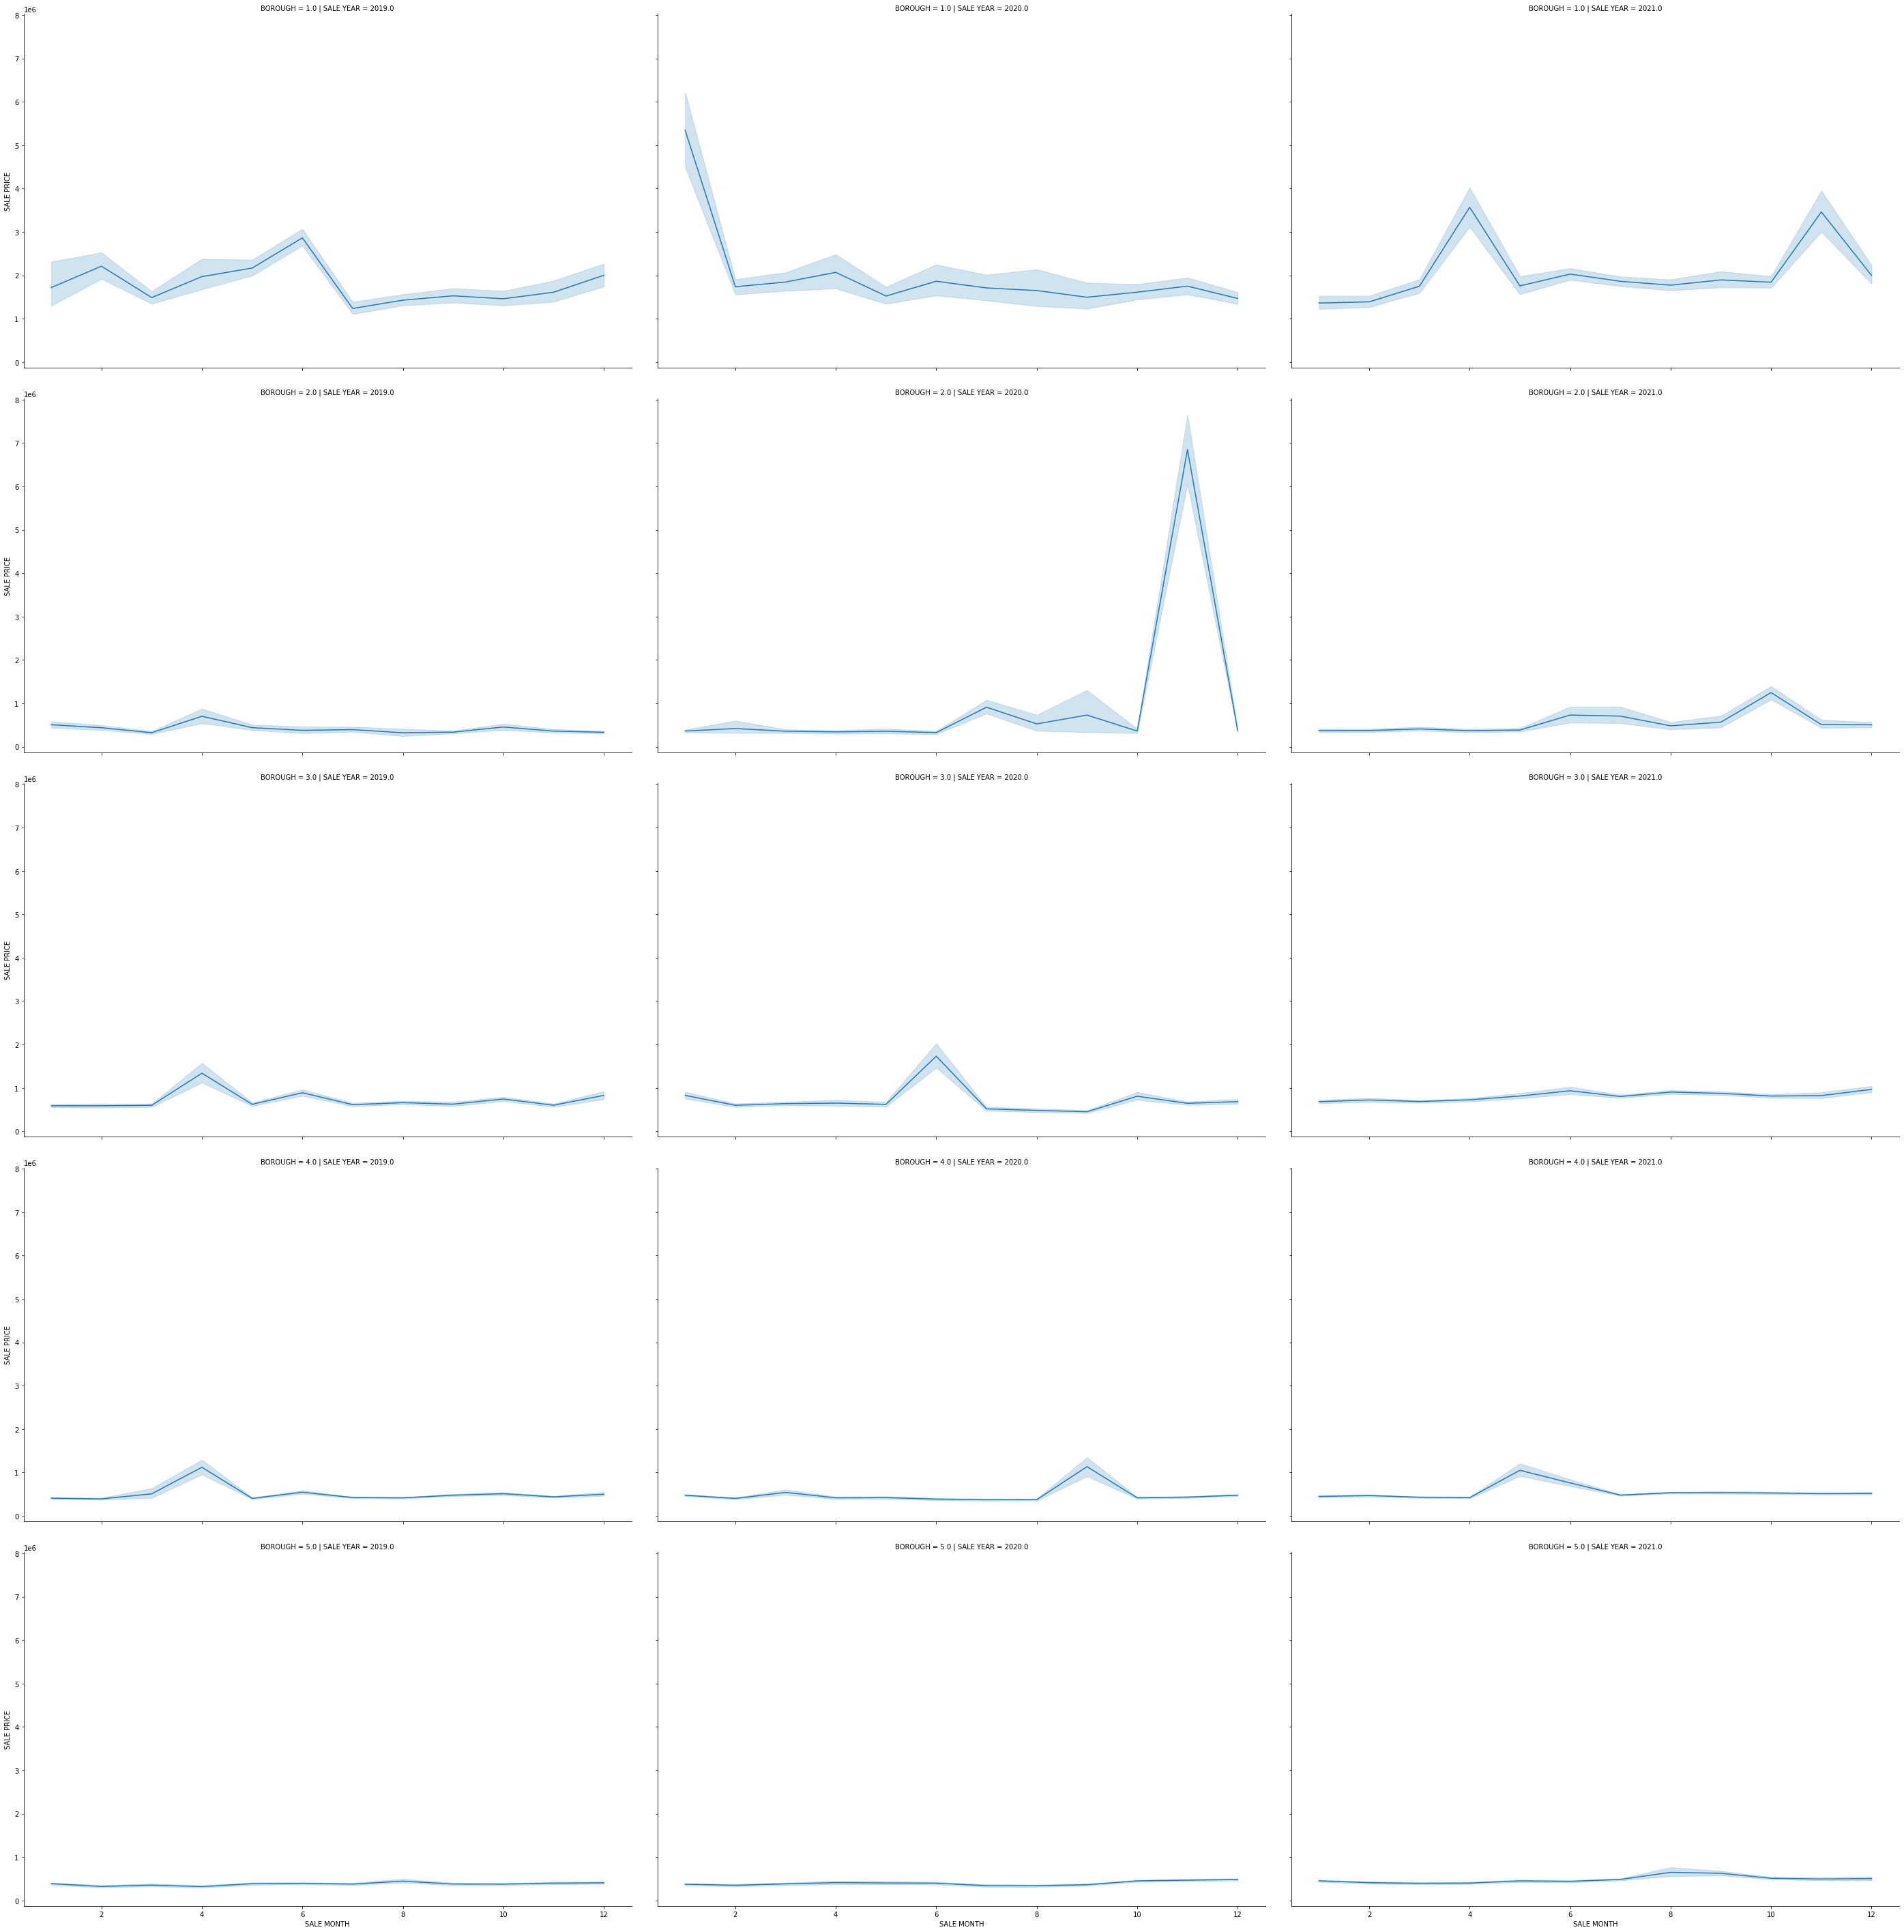

In [35]:
g = sns.relplot(data=df_target, x="SALE MONTH", y="SALE PRICE", col="SALE YEAR",row="BOROUGH", kind="line")
g.fig.set_figheight(40)
g.fig.set_figwidth(40)

In [36]:
sns.relplot(x="SALE MONTH", y="SALE PRICE", data=df_target, kind="line",hue="BOROUGH", col="BUILDING CLASS CATEGORY",col_wrap=3, facet_kws=dict(sharey=False))

#5.Modeling


## 0. Simple Basic Model

In [37]:
# Goal is to create a simple regression model.